# Generate Region of Interests (ROI) labeled arrays for simple shapes
This example notebook explain the use of analysis module "skbeam/core/roi" https://github.com/scikit-beam/scikit-beam/blob/master/skbeam/core/roi.py 

In [1]:
import skbeam.core.roi as roi
import skbeam.core.correlation as corr

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

import xray_vision.mpl_plotting as mpl_plot

### Easily switch between interactive and static matplotlib plots

In [2]:
interactive_mode = False

import matplotlib as mpl
if interactive_mode:
    %matplotlib notebook
else:
    %matplotlib inline

backend = mpl.get_backend()
cmap='viridis'

## Draw annual (ring-shaped) regions of interest

In [3]:
center = (100., 100.)   # center of the rings

# Image shape which is used to determine the maximum extent of output pixel coordinates
img_shape = (200, 205)   

first_q = 10.0 # inner radius of the inner-most ring
delta_q = 5.0  #ring thickness

num_rings = 7  # number of Q rings

# step or spacing, spacing between rings 
one_step_q = 5.0  #  one spacing between rings

step_q = [2.5, 3.0, 5.8]   # differnt spacing between rings

### Test when there is same spacing between rings

In [4]:
# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=delta_q, spacing=one_step_q,
                           num_rings=num_rings)
edges

array([[ 10.,  15.],
       [ 20.,  25.],
       [ 30.,  35.],
       [ 40.,  45.],
       [ 50.,  55.],
       [ 60.,  65.],
       [ 70.,  75.]])

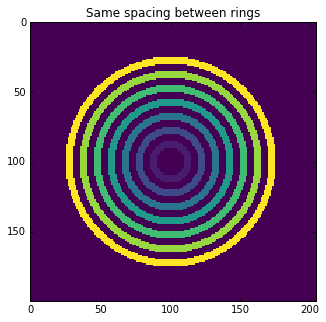

In [5]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.rings(edges, center, img_shape)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Same spacing between rings")
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()

### Test when there is different spacing between rings

In [6]:
# inner and outer radius for each ring

edges = roi.ring_edges(first_q, width=delta_q, spacing=step_q,
                           num_rings=4)
print("edges when there is different spacing between rings", edges)

edges when there is different spacing between rings [[ 10.   15. ]
 [ 17.5  22.5]
 [ 25.5  30.5]
 [ 36.3  41.3]]


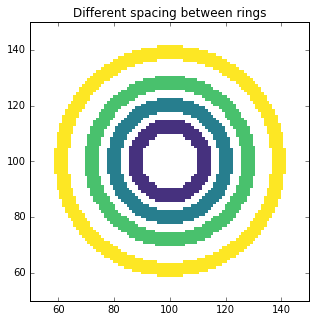

In [7]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.rings(edges, center, img_shape)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Different spacing between rings")
axes.set_xlim(50, 150)
axes.set_ylim(50, 150)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()


### Test when there is no spacing between rings

In [8]:
# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=delta_q, num_rings=num_rings)
edges

array([[ 10.,  15.],
       [ 15.,  20.],
       [ 20.,  25.],
       [ 25.,  30.],
       [ 30.,  35.],
       [ 35.,  40.],
       [ 40.,  45.]])

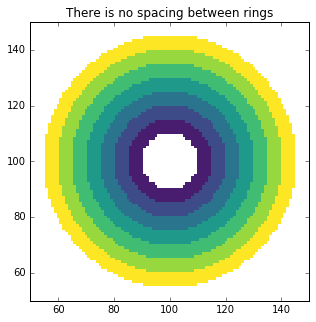

In [9]:


#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.rings(edges, center, img_shape)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("There is no spacing between rings")
axes.set_xlim(50, 150)
axes.set_ylim(50, 150)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()

### Generate a ROI of Segmented Rings¶

In [10]:
center = (75, 75)   # center of the rings

#Image shape which is used to determine the maximum extent of output pixel coordinates
img_shape = (150, 140) 

first_q = 5.0  # inner radius of the inner-most ring
delta_q = 5.0  #ring thickness
num_rings = 4  # number of rings

slicing = 4 # number of pie slices or list of angles in radians
spacing = 4 # margin between rings, 0 by default



#### find the inner and outer radius of each ring


In [11]:
# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=delta_q, spacing=spacing,
                           num_rings=num_rings)

edges

array([[  5.,  10.],
       [ 14.,  19.],
       [ 23.,  28.],
       [ 32.,  37.]])

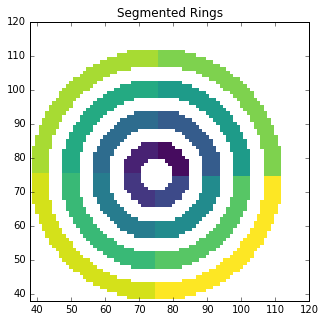

In [12]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.segmented_rings(edges, slicing, center,
                                      img_shape, offset_angle=0)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Segmented Rings")
axes.set_xlim(38, 120)
axes.set_ylim(38, 120)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()


### Generate a  ROI of Pies

In [13]:
first_q = 0  

# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=50, num_rings=1)

edges

array([[  0.,  50.]])

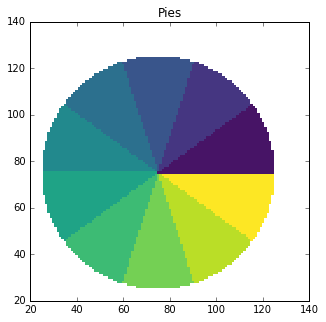

In [14]:
slicing = 10 # number of pie slices or list of angles in radians

#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.segmented_rings(edges, slicing, center,
                                      img_shape, offset_angle=0)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Pies")
axes.set_xlim(20, 140)
axes.set_ylim(20, 140)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()

## Ellipse ROI

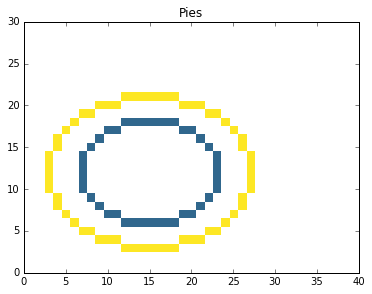

In [15]:
e_label_array =roi.ellipse((100, 100), (12, 15), [6, 9],
                       [8, 12])


# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Pies")
axes.set_xlim(0, 40)
axes.set_ylim(0, 30)
im = mpl_plot.show_label_array(axes, e_label_array, cmap)
plt.show()

## Rectangle region of interests.

In [16]:
# Image shape which is used to determine the maximum extent of output pixel coordinates
shape = (15, 26)

# coordinates of the upper-left corner and width and height of each rectangle
roi_data = np.array(([2, 2, 6, 3], [6, 7, 8, 5], [8, 18, 5, 10]),
                        dtype=np.int64)

#Elements not inside any ROI are zero; elements inside each ROI are 1, 2, 3, corresponding
# to the order they are specified in coords.
label_array = roi.rectangles(roi_data, shape)
roi_inds, pixel_list = roi.extract_label_indices(label_array)

## Generate Bar ROI's

In [17]:
shape = (20, 20)
edges = [[3, 4], [5, 7], [12, 15]]
edges

[[3, 4], [5, 7], [12, 15]]

## Create Horizontal bars and Vertical bars

In [53]:
def bar(edges, shape, horizontal=True, values=None):
    """Draw bars defined by `edges` from one edge to the other of `image_shape`

    Bars will be horizontal or vertical depending on the value of `horizontal`

    Parameters
    ----------
    edges : list
        List of tuples of inner (left or top) and outer (right or bottom)
        edges of each bar.
        e.g., edges=[(1, 2), (11, 12), (21, 22)]
    shape : tuple
        Shape of the image in which to create the ROIs
        e.g., shape=(512, 512)
    horizontal : bool, optional
        True: Make horizontal bars
        False: Make vertical bars
        Defaults to True
    values : array, optional
        image pixels co-ordinates

    Returns
    -------
    label_array : array
        Elements not inside any ROI are zero; elements inside each
        ROI are 1, 2, 3, corresponding to the order they are
        specified in `edges`.
        Has shape=`image shape`

    Note
    ----
    The primary use case is in GISAXS.
    """
    edges = np.atleast_2d(np.asarray(edges)).ravel()
    if not 0 == len(edges) % 2:
        raise ValueError("edges should have an even number of elements, "
                         "giving inner, outer edge value for each bar")
    if not np.all(np.diff(edges) >= 0):
        raise ValueError("edges are expected to be monotonically increasing, "
                         "giving inner and outer radii of each bar from "
                         "r=0 outward")
    if values is None:    
        values = np.repeat(range(shape[0]), shape[1])
        print (values)
    if not horizontal:
        #values = np.repeat(range(shape[1]), shape[0])
        values = values.reshape(shape).T.ravel()
        print (values)

    return _make_roi(values, edges, shape)

def _make_roi(coords, edges, shape):
    """ Helper function to create ring rois and bar rois

    Parameters
    ----------
    coords : array
        shape is image shape
    edges : list
        List of tuples of inner (left or top) and outer (right or bottom)
        edges of each roi.
        e.g., edges=[(1, 2), (11, 12), (21, 22)]
    shape : tuple
        Shape of the image in which to create the ROIs
        e.g., shape=(512, 512)

    Returns
    -------
    label_array : array
        Elements not inside any ROI are zero; elements inside each
        ROI are 1, 2, 3, corresponding to the order they are
        specified in `edges`.
        Has shape=`image shape`
    """
    label_array = np.digitize(coords, edges, right=False)
    # Even elements of label_array are in the space between rings.
    label_array = (np.where(label_array % 2 != 0, label_array, 0) + 1) // 2
    return label_array.reshape(shape)


In [22]:
h_label_array = roi.bar(edges, (10, 15))   # Horizontal Bars

In [23]:
v_label_array = roi.bar(edges, (10, 15), horizontal=False)   # Vertical Bars

## Create Box ROI's

In [24]:
b_label_array = roi.box((20, 25), edges)

## Plot bar rois, box rois and rectangle rois

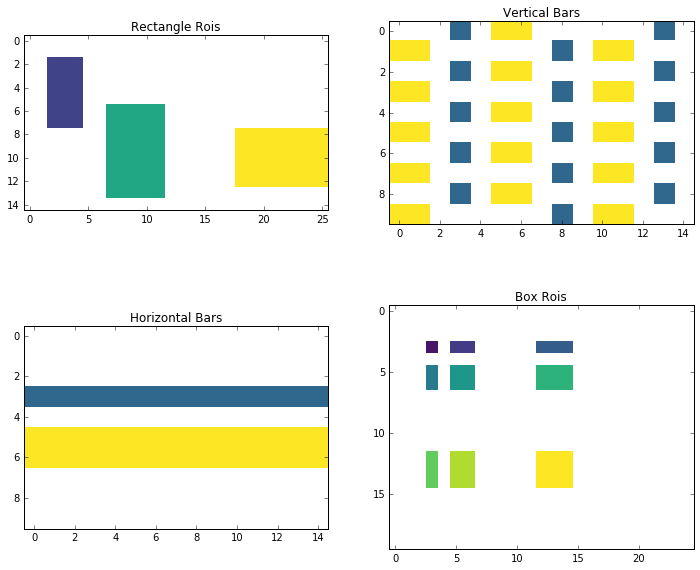

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[1, 0].set_title("Horizontal Bars")
im = mpl_plot.show_label_array(axes[1, 0], h_label_array, cmap)
axes[0, 1].set_title("Vertical Bars")
im = mpl_plot.show_label_array(axes[0, 1], v_label_array, cmap)
axes[1, 1].set_title("Box Rois")
im = mpl_plot.show_label_array(axes[1, 1], b_label_array, cmap)
axes[0, 0].set_title("Rectangle Rois")
im = mpl_plot.show_label_array(axes[0, 0], label_array, cmap)
plt.show()

In [21]:
import skbeam
print(skbeam.__version__)

0.0.7+107.g8f7ff4d
